<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center"> DATOS DE BATEADORES DE LAS GRANDES LIGAS DE BÉISBOL DE LAS TEMPORADAS 1986 y 1987.</h2>
<h3 align="center">Métodos ensamble de regresión. Arbol de desición</h3>


$\;$

---

## Arboles de desición


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree, preprocessing, model_selection, ensemble
from sklearn.tree import export_graphviz 
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, mean_squared_error, make_scorer, plot_confusion_matrix, classification_report
from sklearn import metrics

In [15]:
datos_hitters = pd.read_csv('Hitters.csv')

print('Filas:', datos_hitters.shape[0], 'Variables:', datos_hitters.shape[1])
print(type(datos_hitters))
print(datos_hitters.head())

Filas: 322 Variables: 20
<class 'pandas.core.frame.DataFrame'>
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5 

Este conjunto de datos es parte del paquete R ISLR y se utiliza en el libro relacionado de G. James et al. (2013) "Una introducción al aprendizaje estadístico con aplicaciones en R" para demostrar cómo se realizan la regresión de Ridge y LASSO utilizando R.


In [16]:
datos_hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [17]:
# Datos faltantes (NaN) por variable
print(datos_hitters.isna().sum(axis = 0))

# Eliminamos los 59 registros con datos faltantes en "Salary"
datos_hitters = datos_hitters.dropna()
print('Tras eliminar NaNs\n','Filas:', datos_hitters.shape[0], 'Variables:', datos_hitters.shape[1])

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64
Tras eliminar NaNs
 Filas: 263 Variables: 20


In [18]:
print(datos_hitters.isna().sum(axis = 0))

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64


Ya no se tienen datos faltantes.

#### Distribución de la variable respuesta "Salary"

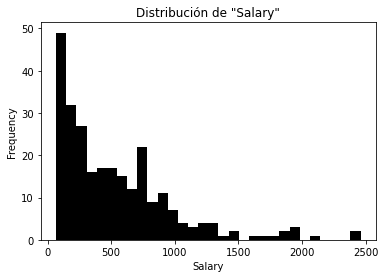

In [19]:
datos_hitters['Salary'].plot(kind='hist', bins=30, color='black')
plt.title('Distribución de "Salary"')
plt.xlabel('Salary')
plt.show()

In [20]:
# Aplicamos la transformación logarítmica a los datos de "Salary" para hacer su distribución mas normal
datos_hitters['Salary'] = np.log(datos_hitters['Salary'])

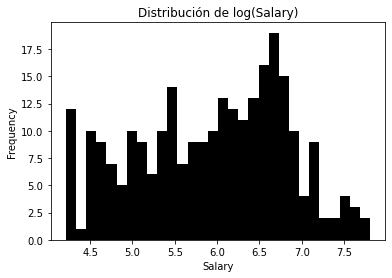

In [21]:
# Distribucion de la variable "Salary" transformada
datos_hitters['Salary'].plot(kind='hist', bins=30, color='black')
plt.title('Distribución de log(Salary)')
plt.xlabel('Salary')
plt.show()

In [22]:
# DIVISION MANUAL

X_train = datos_hitters.loc[:201, datos_hitters.columns != 'Salary']
y_train = datos_hitters.loc[:201, 'Salary']

X_test = datos_hitters.loc[201:, datos_hitters.columns != 'Salary']
y_test = datos_hitters.loc[201:, 'Salary']

In [23]:
# DIVISION ALEATORIA

# Separamos los predictores (X) de la variable respuesta (y)
#X = datos_hitters.loc[:, datos_hitters.columns != 'Salary']
#y = datos_hitters['Salary']

# Dividimos los datos en entrenamiento (80%) y test (20%) de forma aleatoria
#X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0, test_size=0.2)

In [24]:
# Es necesario codificar las variables categorifcas "League", "NewLeague" y "Division" a numericas
cat = preprocessing.LabelEncoder()
for col in ['League', 'NewLeague', 'Division']:
    X_train.loc[:,col] = cat.fit_transform(X_train.loc[:,col])
    X_test.loc[:,col] = cat.fit_transform(X_test.loc[:,col])

### Importando clase DecisionTreeRegressorr de la libreria sklearn.ensemble

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Establecemos un grid con las combinaciones de valores que queremos evaluar. Combinaciones resultantes=3*5*3*3=135
grid_hiperparametros = {'criterion': ['mse'], 
                        'min_samples_split': [10, 20, 30, 40, 50], #nº minimo de observaciones para dividir nodo
                        'max_depth': [2, 3, 4, 5], # profundidad maxima (pre-poda)
                        'ccp_alpha': [0.001, 0.002, 0.003]} #parametro de poda

# Definimos las métricas de interés
metricas = {'r2':make_scorer(metrics.r2_score), 'mse': make_scorer(mean_squared_error)}

# Definimos los parámetros de la búsqueda por validación cruzada
busqueda_grid = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 0), #tipo de modelo
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit = 'mse',
                             #return_train_score = True,
                             n_jobs = -1)


# Aplicamos la busqueda
busqueda_grid.fit(X_train, y_train)

# Mejores hiperparametros sobre los datos hold-out y métricas de validación cruzada
print('Conjunto de hiperparámetros óptimo:\n', busqueda_grid.best_params_,
     '\nMSE +- std =', round(busqueda_grid.cv_results_['mean_test_mse'][busqueda_grid.best_index_],3),
     '+-', round(busqueda_grid.cv_results_['std_test_mse'][busqueda_grid.best_index_],3),
     '\nR^2 =', round(busqueda_grid.cv_results_['mean_test_r2'][busqueda_grid.best_index_],3),
     '+-', round(busqueda_grid.cv_results_['std_test_r2'][busqueda_grid.best_index_],3))

Conjunto de hiperparámetros óptimo:
 {'ccp_alpha': 0.001, 'criterion': 'mse', 'max_depth': 2, 'min_samples_split': 50} 
MSE +- std = 0.316 +- 0.125 
R^2 = 0.607 +- 0.158


In [26]:
# Especificamos los parametros deseados
modelo_arbolR = DecisionTreeRegressor(criterion = 'mse', 
                                      min_samples_split = 50, #nº minimo de observaciones para dividir nodo 
                                      max_depth = 2, #profundidad maxima
                                      ccp_alpha = 0.001,
                                      random_state = 0) #semilla

# Entrenamos el modelo con los datos de entrenamiento 
modelo_arbolR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.001, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [27]:
print(modelo_arbolR.predict(X_train[:10]))    #mejorar codigo
print(y_train)

[6.20472772 6.82848803 6.20472772 4.59683464 6.20472772 4.59683464
 4.59683464 4.59683464 6.82848803 6.82848803]
1      6.163315
2      6.173786
3      6.214608
4      4.516339
5      6.620073
         ...   
195    6.684612
196    6.375876
198    4.976734
200    6.040255
201    4.317488
Name: Salary, Length: 160, dtype: float64


In [28]:
modelo_arbolR.score(X_test,y_test)

0.43778443204521394

In [29]:
modelo_arbolR.score(X_train, y_train)

0.7712511420612223

---
La fundión *export_graphviz* es usada para crear un archivo **.dot** el cual tiene toda la información de nuestro arbol.

In [30]:
print(datos_hitters.columns)
print(X_train.columns)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')
Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')


In [31]:
export_graphviz(modelo_arbolR, out_file='arbol.dot',  feature_names=X_train.columns.tolist(), impurity=False , filled=True)

In [32]:
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

NameError: name 'graphviz' is not defined

In [33]:
import graphviz
from sklearn.tree import export_graphviz

In [34]:
treedot = export_graphviz(modelo_arbolR,
                         out_file=None,
                         feature_names=X_test.columns)    #aqui se coloco X_test

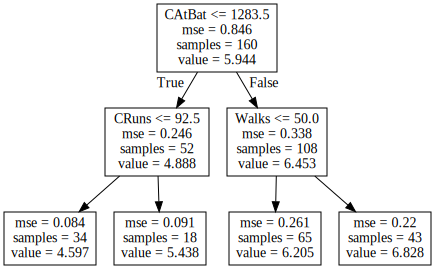

In [35]:
graphviz.Source(treedot)

In [36]:
# Exportamos el arbol a archivo .dot
nombre_variables = X_train.columns.tolist()

export_graphviz(modelo_arbolR, out_file="treeR.dot", filled=True, feature_names=nombre_variables, rounded=True)

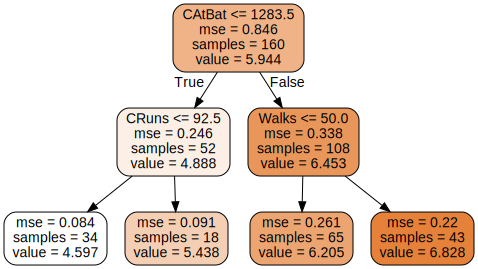

In [37]:
with open('treeR.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

---

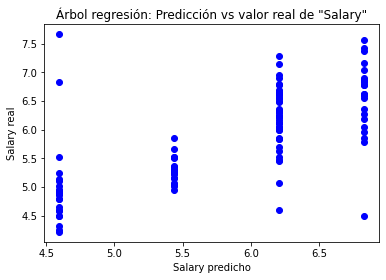

In [38]:
# Obtenemos las predicciones del modelo sobre los datos de test
y_pred = modelo_arbolR.predict(X_test)

plt.scatter(y_pred, y_test, color = 'blue') 
plt.title('Árbol regresión: Predicción vs valor real de "Salary"')
plt.xlabel('Salary predicho')
plt.ylabel('Salary real')
plt.show()

In [39]:
# TEST

# Métricas en test
print('Métricas de test:',
      '\nMAE =', round(metrics.mean_absolute_error(y_test, y_pred),3),
      '\nMSE =', round(metrics.mean_squared_error(y_test, y_pred), 3),
      '\nRMSE =', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3),
      '\nR^2 =', round(modelo_arbolR.score(X_test, y_test), 3))

Métricas de test: 
MAE = 0.423 
MSE = 0.401 
RMSE = 0.633 
R^2 = 0.438
